## Homework 6

### Task 1

In [17]:
import flammkuchen as fl
import matplotlib.pyplot as plt

In [62]:
rectangles = fl.load("rectangles_dsss.sec")
rectangles.keys()

dict_keys(['ground_truth', 'predicted'])

In [63]:
rec_ground_truth = rectangles.get('ground_truth')
rec_prediction = rectangles.get('predicted')

In [64]:
def calculate_IoU(rec1, rec2):
    '''
    @params:
        rec1, rec2: tuples with rectangle information (x_coordinate, y_coordinate, width, height)
    '''
    x1, y1, width1, height1 = rec1
    x2, y2, width2, height2 = rec2

    #coordinates of interaction:
    x_left = max(x1,x2)
    y_bottom = max(y1,y2)
    x_right = min(x1+width1, x2+width2)
    y_top = min(y1+height1, y2+height2)

    if x_left > x_right or y_bottom > y_top:
        return 0

    area_of_overlap = (x_right - x_left) * (y_top - y_bottom)
    area_of_union = width1 * height1 + width2 * height2 - area_of_overlap
    iou = area_of_overlap / area_of_union

    return iou

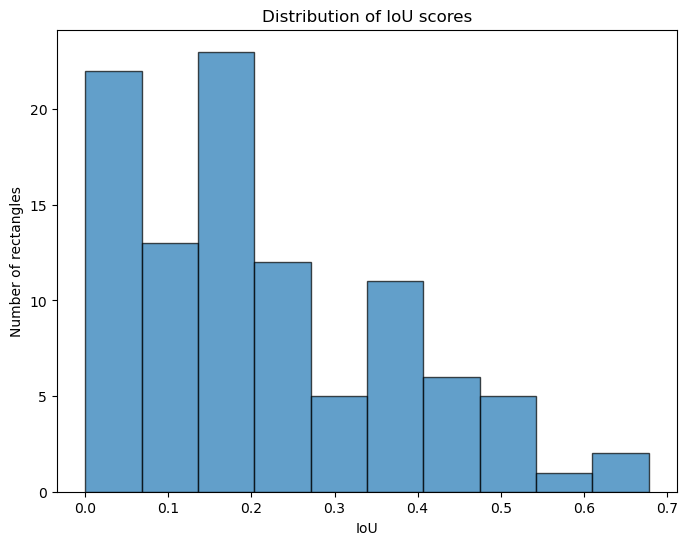

In [66]:
ious = []
for rect1, rect2 in zip(rec_ground_truth, rec_prediction):
    iou = calculate_IoU(rect1, rect2)
    ious.append(iou)

plt.figure(figsize=(8, 6))
plt.hist(ious, bins=10, alpha=0.7, edgecolor='black')
plt.title("Distribution of IoU scores")
plt.xlabel("IoU")
plt.ylabel("Number of rectangles")
plt.savefig("PlotsImages/IoU_scored.png")
plt.show()

### Task 2

In [21]:
import albumentations as A
from albumentations.core.transforms_interface import DualTransform, BasicTransform
import numpy as np
import glob
import re
from PIL import Image

In [42]:
BAGLS_PATH = "Mini_BAGLS_dataset"

np.random.seed(22442020)

# Funktion zur Extraktion der Nummer aus dem Dateinamen
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

images = glob.glob(BAGLS_PATH + "/*.png")  
masks = glob.glob(BAGLS_PATH + "/*seg.png")
images = sorted([img for img in images if not img.endswith("seg.png")], key=extract_number)
masks = sorted(masks, key=extract_number)

print(images)
print(masks)
# Überprüfen, ob die Anzahl der Bilder und Masken übereinstimmt
if len(images) != len(masks):
    raise ValueError("Die Anzahl der Bilder und Masken stimmt nicht überein.")

# Wähle ein zufälliges Bild-Maske-Paar
index = np.random.choice(len(images))
selected_image = Image.open(images[index])
selected_mask = Image.open(masks[index])

['Mini_BAGLS_dataset\\0.png', 'Mini_BAGLS_dataset\\1.png', 'Mini_BAGLS_dataset\\2.png', 'Mini_BAGLS_dataset\\3.png', 'Mini_BAGLS_dataset\\4.png', 'Mini_BAGLS_dataset\\5.png', 'Mini_BAGLS_dataset\\6.png', 'Mini_BAGLS_dataset\\7.png', 'Mini_BAGLS_dataset\\8.png', 'Mini_BAGLS_dataset\\9.png', 'Mini_BAGLS_dataset\\10.png', 'Mini_BAGLS_dataset\\11.png', 'Mini_BAGLS_dataset\\12.png', 'Mini_BAGLS_dataset\\13.png', 'Mini_BAGLS_dataset\\14.png', 'Mini_BAGLS_dataset\\15.png', 'Mini_BAGLS_dataset\\16.png', 'Mini_BAGLS_dataset\\17.png', 'Mini_BAGLS_dataset\\18.png', 'Mini_BAGLS_dataset\\19.png', 'Mini_BAGLS_dataset\\20.png', 'Mini_BAGLS_dataset\\21.png', 'Mini_BAGLS_dataset\\22.png', 'Mini_BAGLS_dataset\\23.png', 'Mini_BAGLS_dataset\\24.png', 'Mini_BAGLS_dataset\\25.png', 'Mini_BAGLS_dataset\\26.png', 'Mini_BAGLS_dataset\\27.png', 'Mini_BAGLS_dataset\\28.png', 'Mini_BAGLS_dataset\\29.png', 'Mini_BAGLS_dataset\\30.png', 'Mini_BAGLS_dataset\\31.png', 'Mini_BAGLS_dataset\\32.png', 'Mini_BAGLS_dataset

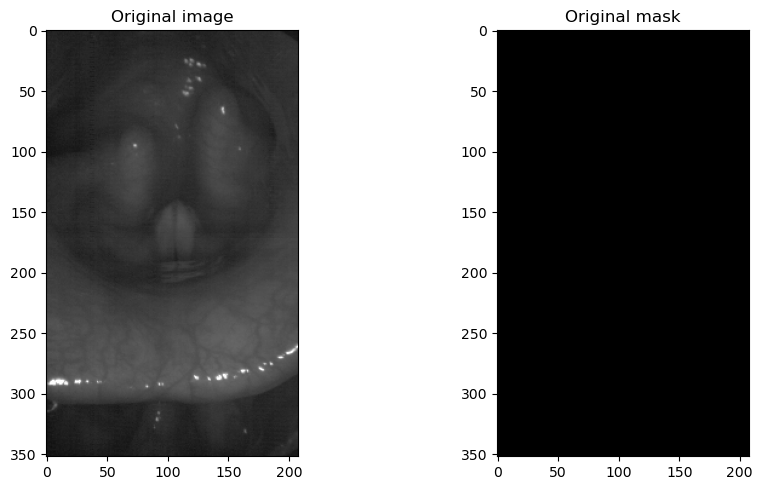

In [67]:
# Plot original image and mask

# Bilder anzeigen
plt.figure(figsize=(10, 5))

# Originalbild
plt.subplot(1, 2, 1)
plt.imshow(selected_image)
plt.title("Original image")

# Maske
plt.subplot(1, 2, 2)
plt.imshow(selected_mask, cmap="gray")
plt.title("Original mask")

plt.tight_layout()
plt.savefig("PlotsImages/Original.png")
plt.show()

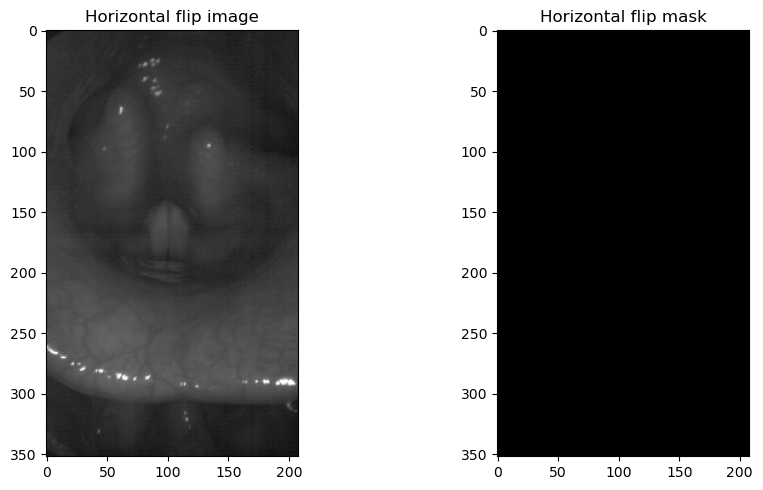

In [68]:
image_array = np.array(selected_image)
mask_array = np.array(selected_mask)

aug = A.HorizontalFlip(p=1)

augmented = aug(image=image_array, mask=mask_array)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']


# Bilder anzeigen
plt.figure(figsize=(10, 5))

# Originalbild
plt.subplot(1, 2, 1)
plt.imshow(image_h_flipped)
plt.title("Horizontal flip image")

# Maske
plt.subplot(1, 2, 2)
plt.imshow(mask_h_flipped, cmap="gray")
plt.title("Horizontal flip mask")

plt.tight_layout()
plt.savefig("PlotsImages/HorizontalFlip.png")
plt.show()

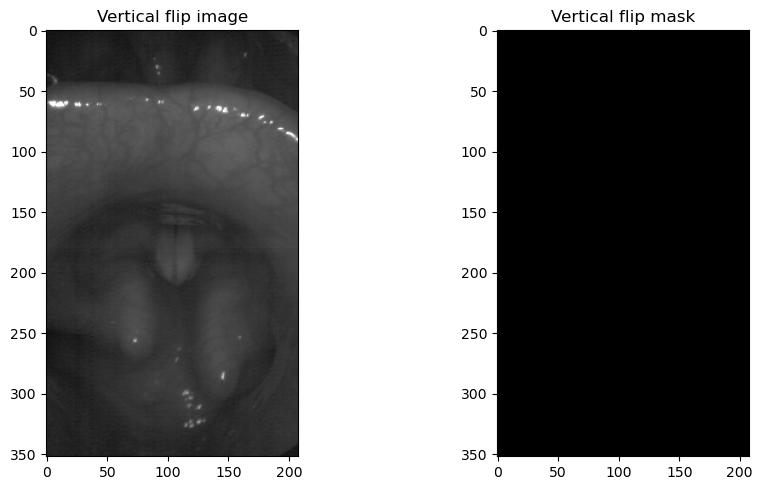

In [69]:
aug = A.VerticalFlip(p=1)

augmented = aug(image=image_array, mask=mask_array)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

# Bilder anzeigen
plt.figure(figsize=(10, 5))

# Originalbild
plt.subplot(1, 2, 1)
plt.imshow(image_v_flipped)
plt.title("Vertical flip image")

# Maske
plt.subplot(1, 2, 2)
plt.imshow(mask_v_flipped, cmap="gray")
plt.title("Vertical flip mask")

plt.tight_layout()
plt.savefig("PlotsImages/VerticalFlip.png")
plt.show()

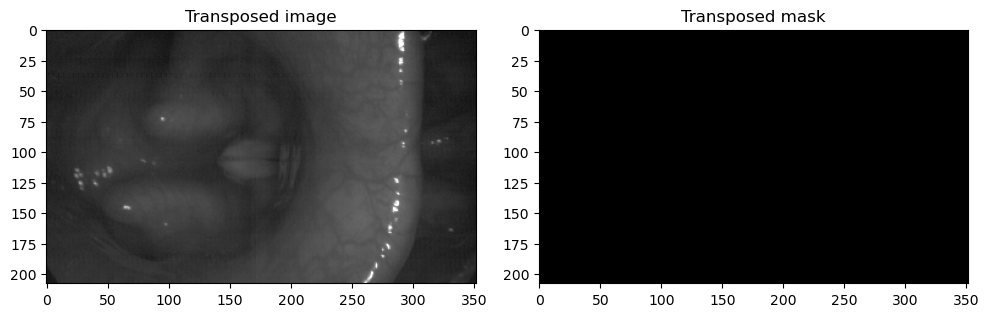

In [70]:
aug = A.Transpose(p=1)

augmented = aug(image=image_array, mask=mask_array)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

# Bilder anzeigen
plt.figure(figsize=(10, 5))

# Originalbild
plt.subplot(1, 2, 1)
plt.imshow(image_transposed)
plt.title("Transposed image")

# Maske
plt.subplot(1, 2, 2)
plt.imshow(mask_transposed, cmap="gray")
plt.title("Transposed mask")

plt.tight_layout()
plt.savefig("PlotsImages/Transposed.png")
plt.show()

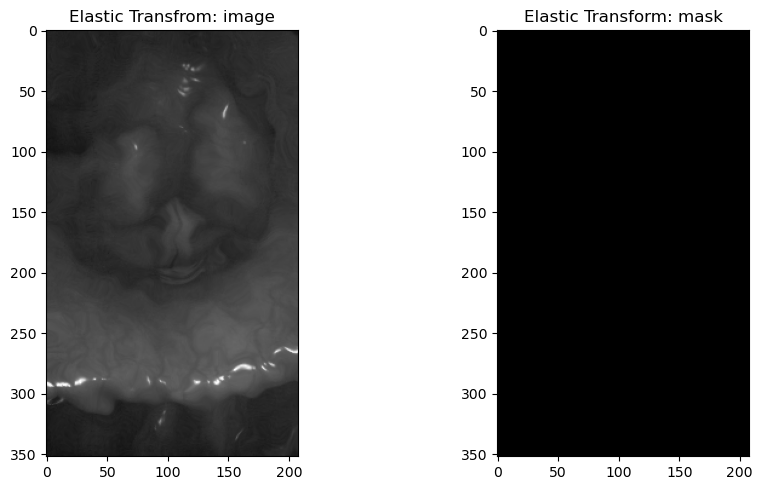

In [71]:
import random 

aug = A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=None)

random.seed(7)
augmented = aug(image=image_array, mask=mask_array)

image_elastic = augmented['image']
mask_elastic = augmented['mask']

# Bilder anzeigen
plt.figure(figsize=(10, 5))

# Originalbild
plt.subplot(1, 2, 1)
plt.imshow(image_elastic)
plt.title("Elastic Transfrom: image")

# Maske
plt.subplot(1, 2, 2)
plt.imshow(mask_elastic, cmap="gray")
plt.title("Elastic Transform: mask")

plt.tight_layout()
plt.savefig("PlotsImages/Elastic.png")
plt.show()